In [2]:
from pathlib import Path
import pandas as pd


In [3]:
data = Path('clean_train.csv')
df = pd.read_csv(data)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [4]:
# Segment the features from the target
X = df.drop("Survived", axis=1)
y = df['Survived']

In [148]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
df.count()

Survived      891
Pclass        891
Age           891
SibSp         891
Parch         891
Fare          891
Sex_female    891
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)
X_train.shape

(668, 10)

In [7]:
import sklearn
from sklearn.naive_bayes import GaussianNB

In [8]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [9]:
#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7892376681614349


In [11]:
# Make predictions using the test data 
gnb_predictions = gnb.predict(X_test)
gnb_result = pd.DataFrame({"Prediction": gnb_predictions, "Actual": y_test}).reset_index(drop=True)
gnb_result.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


In [12]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gnb_predictions)

array([[115,  22],
       [ 25,  61]], dtype=int64)

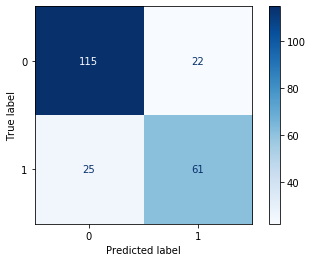

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( gnb,X_test,y_test, cmap = 'Blues')

In [21]:
#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       137
           1       0.73      0.71      0.72        86

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



C:\Users\rajee\.conda\envs\pyvizen\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


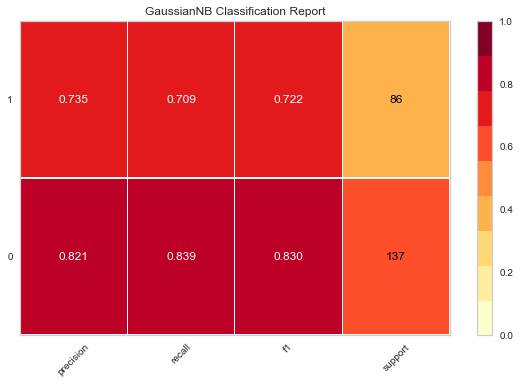

In [22]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(gnb, support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [23]:
# Import and Create  MLP Classifier.
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='adam', max_iter=400)

#fit the model.
mlp.fit(X_train,y_train)

# Make predictions using the test data 
mlp_predict = mlp.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, mlp_predict))

Accuracy: 0.7757847533632287


In [25]:
print(confusion_matrix(y_test,mlp_predict))
print(classification_report(y_test,mlp_predict))

[[114  23]
 [ 27  59]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       137
           1       0.72      0.69      0.70        86

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



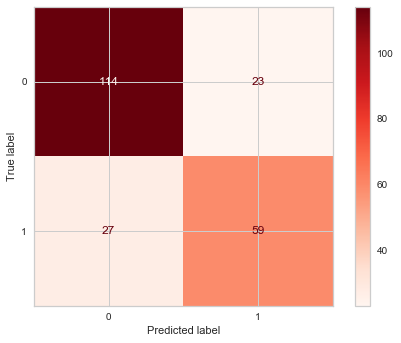

In [26]:
plot_confusion_matrix( mlp,X_test,y_test, cmap = 'Reds')

C:\Users\rajee\.conda\envs\pyvizen\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


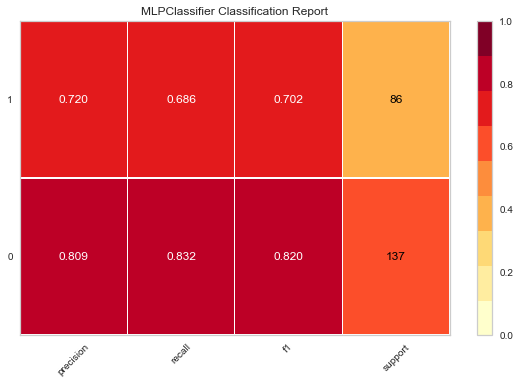

In [27]:
visualizer = ClassificationReport(mlp, support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()